In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add 'overweight' column

bmi = df["weight"] / ((df["height"] / 100) ** 2)

df["bmi"] = bmi

overweight = []

for i in bmi:
    if i > 25:
        overweight.append(1)
    else:
        overweight.append(0)

df["overweight"] = pd.Series(overweight)

In [5]:
# Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.

normal = df.loc[:,["cholesterol","gluc"]] > 1

df.loc[:,["cholesterol","gluc"]] = normal.astype(int)

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


In [11]:
# Create DataFrame for cat plot using `pd.melt` using 
# just the values from 'cholesterol', 'gluc',
# 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df, id_vars="cardio", value_vars=["cholesterol","gluc","smoke","alco","active","overweight"])

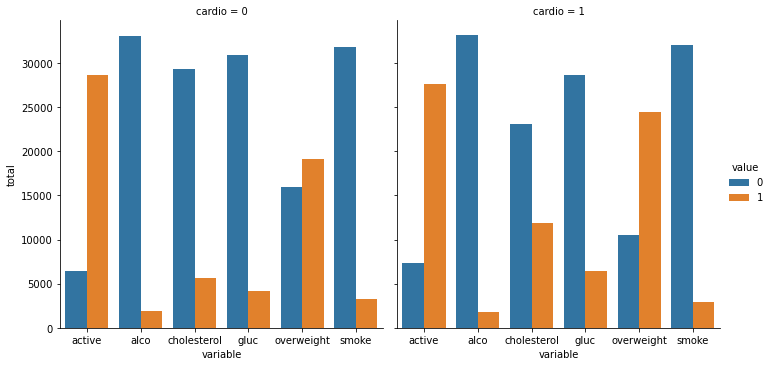

In [12]:
# Group and reformat the data to split it by 'cardio'. 
# Show the counts of each feature. 
# You will have to rename one of the columns for the catplot to work correctly.

df_cat["total"] = 1

df_cat = df_cat.groupby(["cardio", "variable", "value"], as_index=False).count()
    
fig = sns.catplot(x = "variable", y = "total", data = df_cat, hue = "value", kind = "bar", col = "cardio").fig

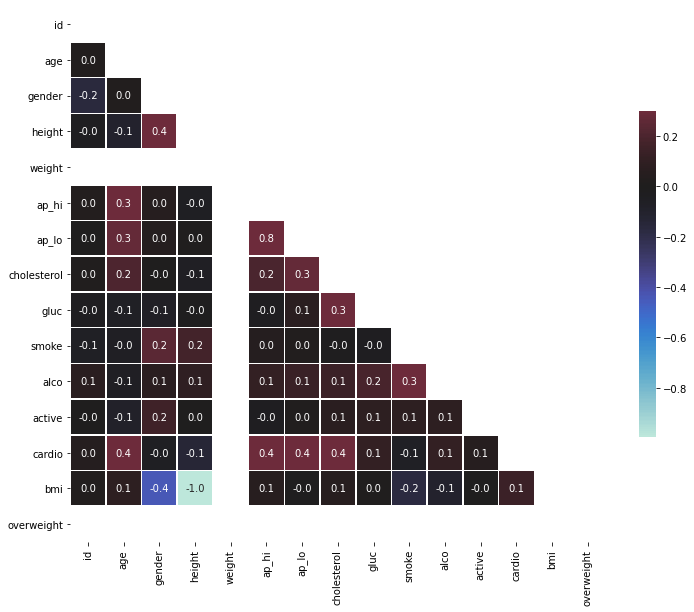

In [20]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.025))]

corr = df_heat.corr()

mask = np.triu(corr)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, mask=mask, vmax=0.3, center=0, annot=True, fmt='.1f', square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

plt.show()